In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df = pd.read_csv("World Population Live Dataset.csv")
df.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


In [8]:
#X = data[["2022","2020"."2015","2010","2000"]]
#Y = data[["Name"]]
print(df.columns)

Index(['CCA3', 'Name', '2022', '2020', '2015', '2010', '2000', '1990', '1980',
       '1970', 'Area (km²)', 'Density (per km²)', 'GrowthRate',
       'World Population Percentage', 'Rank'],
      dtype='object')


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CCA3                         233 non-null    object 
 1   Name                         234 non-null    object 
 2   2022                         234 non-null    int64  
 3   2020                         234 non-null    int64  
 4   2015                         234 non-null    int64  
 5   2010                         234 non-null    int64  
 6   2000                         234 non-null    int64  
 7   1990                         234 non-null    int64  
 8   1980                         234 non-null    int64  
 9   1970                         234 non-null    int64  
 10  Area (km²)                   234 non-null    int64  
 11  Density (per km²)            234 non-null    float64
 12  GrowthRate                   234 non-null    float64
 13  World Population Per

In [10]:
print(df.describe())


               2022          2020          2015          2010          2000  \
count  2.340000e+02  2.340000e+02  2.340000e+02  2.340000e+02  2.340000e+02   
mean   3.407441e+04  3.350109e+04  3.172995e+04  2.984523e+04  2.626947e+04   
std    1.367664e+05  1.355899e+05  1.304050e+05  1.242185e+05  1.116982e+05   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    4.197500e+02  4.150000e+02  4.045000e+02  3.930000e+02  3.272500e+02   
50%    5.560000e+03  5.493000e+03  5.307000e+03  4.943000e+03  4.293000e+03   
75%    2.247675e+04  2.144825e+04  1.973075e+04  1.915950e+04  1.576225e+04   
max    1.425887e+06  1.424930e+06  1.393715e+06  1.348191e+06  1.264099e+06   

               1990           1980           1970    Area (km²)  \
count  2.340000e+02     234.000000     234.000000  2.340000e+02   
mean   2.271024e+04   18984.645299   15786.876068  5.814494e+05   
std    9.783216e+04   81785.136077   67795.064322  1.761841e+06   
min    1.000000e+00 

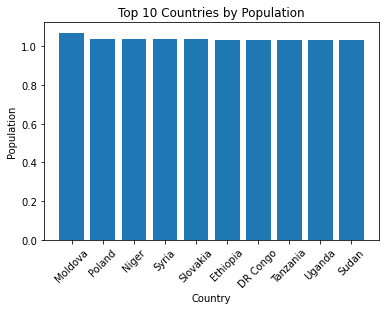

In [21]:
top_10_countries = df.nlargest(10, 'GrowthRate')

# Create a bar chart of top 10 countries by population
plt.bar(top_10_countries['Name'], top_10_countries['GrowthRate'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population')
plt.xticks(rotation=45)
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

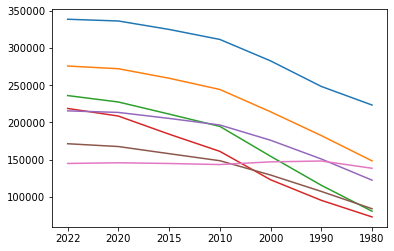

In [25]:
import matplotlib.pyplot as plt

# Get the available years from the dataset
years = df.columns[2:9]

# Get the population data for the available years
populations = df.iloc[2:9, 2:9].values.astype(int)

# Create a line plot of population over the years
for i in range(len(countries)):
    plt.plot(years, populations[i], label=countries[i])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time')
plt.legend()
plt.show()


In [ ]:
pip install prophet

In [32]:
from prophet import Prophet

# Prepare the dataset for Prophet
prophet_df = df[['CCA3', 'World Population Percentage']]
prophet_df.columns = ['ds', 'y']

# Set the number of test samples
n_test_samples = 3

# Split the data into training and testing sets
train_df = prophet_df[:-n_test_samples]
test_df = prophet_df[-n_test_samples:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_df)

# Define the future time period for prediction
future = model.make_future_dataframe(periods=n_future_predictions, freq='Y')

# Make predictions
forecast = model.predict(future)

# Plot the predicted population
model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Prediction')
plt.show()


ParserError: Unknown string format: CN

In [33]:
average_density = df.iloc[2:9, 2:9].mean(axis=0)
print(average_density)


2022    228481.285714
2020    224222.571429
2015    212335.857143
2010    199799.000000
2000    175086.428571
1990    149533.142857
1980    124195.285714
dtype: float64


In [34]:
year = '2022'
highest_population_country = df.iloc[2:9, :].nlargest(1, year)
print(highest_population_country[['Name', year]])


            Name    2022
2  United States  338290


In [35]:
year1 = '2000'
year2 = '2022'
df['GrowthRate'] = (df[year2] - df[year1]) / df[year1] * 100
print(df[['Name', 'GrowthRate']])


                 Name  GrowthRate
0               China   12.798681
1               India   33.741745
2       United States   19.791501
3           Indonesia   28.695486
4            Pakistan   52.766081
..                ...         ...
229        Montserrat  -20.000000
230  Falkland Islands   33.333333
231              Niue    0.000000
232           Tokelau    0.000000
233      Vatican City    0.000000

[234 rows x 2 columns]


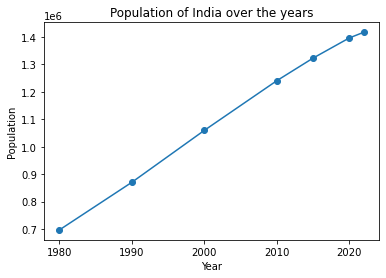

In [36]:
country = 'India'
population_data = df[df['Name'] == country].iloc[:, 2:9]
years = population_data.columns.astype(int)

plt.plot(years, population_data.values.flatten(), marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population of {country} over the years')
plt.show()


ValueError: operands could not be broadcast together with shapes (7,) (234,) 

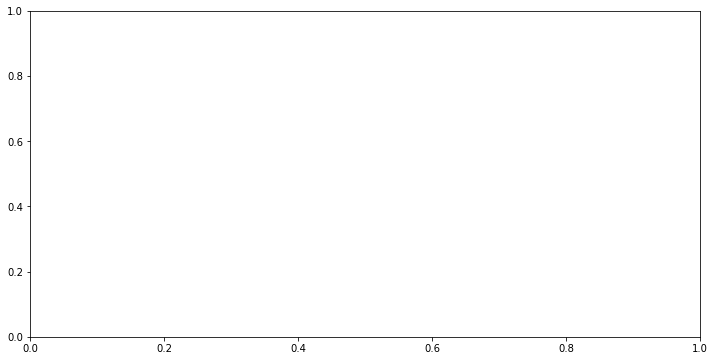

In [37]:
import matplotlib.pyplot as plt

# Select the years for analysis
years = df.columns[2:9].astype(int)

# Get the population data by region
regions = df.iloc[:, 0].values
population_data = df.iloc[:, 2:9].values

# Plot the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(years, population_data.T, labels=regions)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Distribution by Region')
plt.legend(loc='upper left')
plt.show()


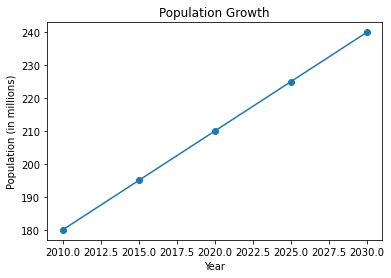

In [38]:
import matplotlib.pyplot as plt

# Years
years = [2010, 2015, 2020, 2025, 2030]

# Population data
population = [180, 195, 210, 225, 240]

# Create line chart
plt.plot(years, population, marker='o')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.title("Population Growth")

# Display the chart
plt.show()


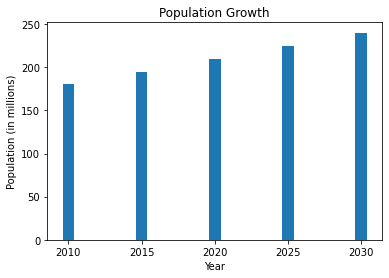

In [41]:
import matplotlib.pyplot as plt

# Years
years = [2010, 2015, 2020, 2025, 2030]

# Population data
population = [180, 195, 210, 225, 240]

# Create bar chart
plt.bar(years, population)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.title("Population Growth")

# Display the chart
plt.show()
